In [1]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
!pip install langchain-openai

In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage

In [5]:
llm = ChatOpenAI(
    model = "gpt-5-nano",
    temperature = 0.2,
    max_tokens = None,
    timeout = None,
    max_retries = 2
)

In [6]:
def multiply(a: int, b: int) -> int:
    """
    multiply a and b

    args:
        a: first int
        b: second int
    """
    return a * b

In [7]:
llm_with_tools = llm.bind_tools([multiply])

In [8]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"what is 2050 multiplied by 3060", name="Lance")])

In [9]:
tool_call

AIMessage(content='6,273,000', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 334, 'prompt_tokens': 150, 'total_tokens': 484, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DAHJQnaYQGMwJDCNievqScdKFLFI8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c6c38-fc1f-77c2-a28d-93463b707687-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 150, 'output_tokens': 334, 'total_tokens': 484, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 320}})

In [10]:
tool_call.tool_calls

[]

In [11]:
from langgraph.graph import MessagesState

In [12]:
class MessagesState(MessagesState):
    pass

In [13]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [14]:
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [15]:
builder = StateGraph(MessagesState)

In [16]:
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

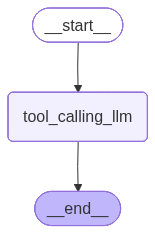

In [17]:
graph

In [18]:
messages = graph.invoke({"messages": HumanMessage("Hello!", name="vijay")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: vijay

Hello!
================================== Ai Message ==================================

Hi Vijay! Nice to meet you. How can I help today? 
- I can explain concepts, solve problems, or help with writing, coding, planning, or brainstorming.
- Tell me what you’re working on or ask me to suggest ideas.


In [21]:
messages = graph.invoke({"messages": HumanMessage("what is 1254454444 multiplied by 17432424445. try to use tools", name="vijay")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: vijay

what is 1254454444 multiplied by 17432424445. try to use tools
================================== Ai Message ==================================
Tool Calls:
  multiply (call_WvEZe6wyOPNduRkSjUSsb2rp)
 Call ID: call_WvEZe6wyOPNduRkSjUSsb2rp
  Args:
    a: 1254454444
    b: 17432424445
